In [0]:
#import of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE



In [13]:
#loading the data
from google.colab import files
uploaded = files.upload()

Saving Churn Modeling.csv to Churn Modeling.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Churn Modeling.csv']))

In [132]:
print(data)
print(data.shape)

      RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
0             1    15634602   Hargrave  ...               1       101348.88      1
1             2    15647311       Hill  ...               1       112542.58      0
2             3    15619304       Onio  ...               0       113931.57      1
3             4    15701354       Boni  ...               0        93826.63      0
4             5    15737888   Mitchell  ...               1        79084.10      0
...         ...         ...        ...  ...             ...             ...    ...
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...               0        38190.78      0

[10

In [133]:
#creating a dummy variables from categorical features
geography = pd.get_dummies(data.loc[:,"Geography"],drop_first=True)
gender = pd.get_dummies(data.loc[:,"Gender"],drop_first=True)

data.drop(['Geography','Gender','Surname','CustomerId','RowNumber'],axis=1,inplace=True)

data = pd.concat([geography,gender,data],axis=1)
data.head()

,Germany,Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10,0


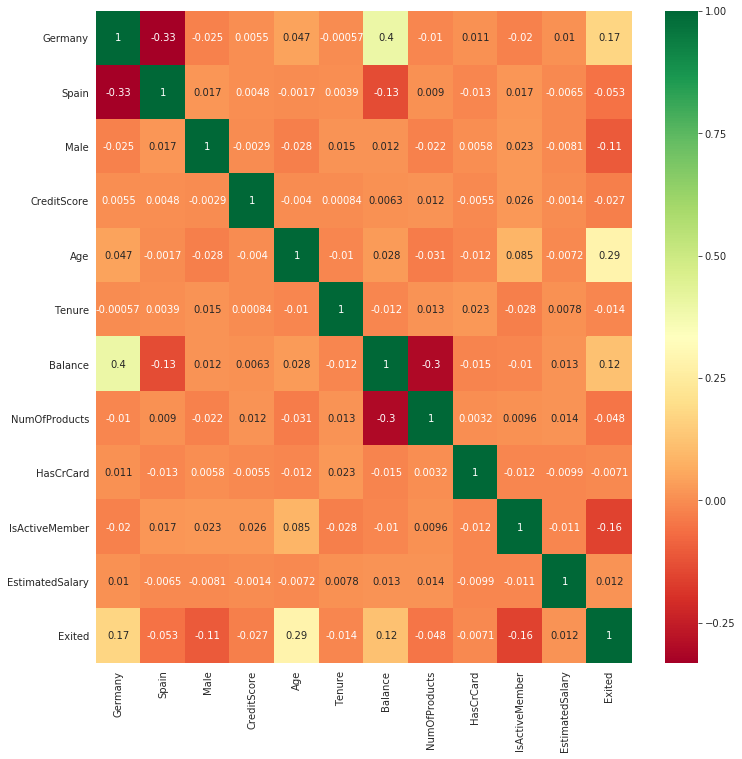

In [162]:
#correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

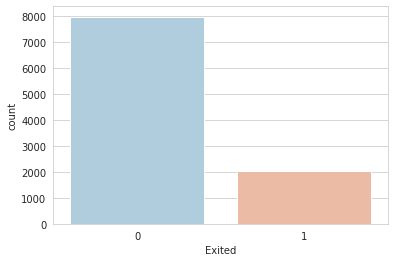

In [134]:
#visualizing target variable
sns.set_style('whitegrid')
sns.countplot(x='Exited',data=data,palette='RdBu_r')

In [140]:
#separate input features and target
featuress = ['Germany', 'Spain', 'Male', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

X = data.loc[:, featuress] #input features
y = data.loc[:,['Exited']].values #target variable

print(X)
print(y)

print(y[y==1].shape)
print(y[y==0].shape)


      Germany  Spain  Male  ...  HasCrCard  IsActiveMember  EstimatedSalary
0           0      0     0  ...          1               1        101348.88
1           0      1     0  ...          0               1        112542.58
2           0      0     0  ...          1               0        113931.57
3           0      0     0  ...          0               0         93826.63
4           0      1     0  ...          1               1         79084.10
...       ...    ...   ...  ...        ...             ...              ...
9995        0      0     1  ...          1               0         96270.64
9996        0      0     1  ...          1               1        101699.77
9997        0      0     0  ...          0               1         42085.58
9998        1      0     1  ...          1               0         92888.52
9999        0      0     0  ...          1               0         38190.78

[10000 rows x 11 columns]
[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]
(2037,)
(7963,)


In [0]:
#splitting data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)


In [152]:
#SCALING FEATURES

#features, which are not categorical
features_1 = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

#categorical features
X_train_k = X_train.loc[:, ['Germany','Spain','Male','HasCrCard','IsActiveMember']] 
X_train_k.index = list(range(0,8000))
#print(X_train_k)

X_test_k = X_test.loc[:, ['Germany','Spain','Male','HasCrCard','IsActiveMember']] 
X_test_k.index = list(range(0,2000))
#print(X_test_k)

#scaling (without categorical features)
X_train = pd.DataFrame(preprocessing.scale(X_train.loc[:,['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])) 
X_test = pd.DataFrame(preprocessing.scale(X_test.loc[:,['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])) 

#concatenating all features
X_train = pd.concat([X_train, X_train_k],axis=1)
X_test = pd.concat([X_test, X_test_k],axis=1)

print(X_train)
print(X_test)

             0         1         2  ...  Male  HasCrCard  IsActiveMember
0     0.959824  0.588915  1.727047  ...     1          1               0
1     0.338998 -0.272020 -0.004589  ...     1          1               1
2     0.142403  0.875894  1.727047  ...     1          1               0
3    -1.078554  1.832488 -0.697243  ...     0          1               0
4    -0.147316 -0.750317  1.380720  ...     0          1               1
...        ...       ...       ...  ...   ...        ...             ...
7995  0.608023  0.493256  1.380720  ...     1          1               0
7996 -0.157663  0.301937 -1.389898  ...     1          0               1
7997 -0.716406  0.684575 -1.043571  ...     1          0               0
7998 -0.530158 -0.463338 -1.043571  ...     1          0               0
7999  0.514899  0.780234 -0.350916  ...     1          1               0

[8000 rows x 11 columns]
             0         1         2  ...  Male  HasCrCard  IsActiveMember
0     0.468750  0.731587 

In [153]:
#LOGISTIC REGRESSION

logreg = LogisticRegression()

y_train = np.reshape(y_train,len(y_train),)

#fitting the model with data
logreg.fit(X_train,y_train)

#predictions
y_pred=logreg.predict(X_test) 

#metrics - precision, recall, f1-score, accuracy
print(classification_report(y_test.ravel(),y_pred))
print("Accuracy:",metrics.accuracy_score(y_test.ravel(), y_pred))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1590
           1       0.62      0.22      0.33       410

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.61      2000
weighted avg       0.79      0.81      0.78      2000

Accuracy: 0.813


array([[1534,   56],
       [ 318,   92]])

0.7730710231630619


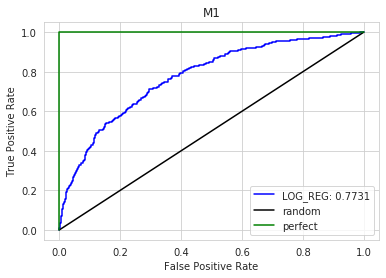

In [154]:
#AUC metrics
y_pred_p=logreg.predict_proba(X_test)
#y_test = np.reshape(y_test,len(y_test),)
#print(y_test.shape)
roc_auc = metrics.roc_auc_score(y_test, y_pred_p[:,1])
print(roc_auc)

#plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p[:,1])

plt.plot(fpr,tpr,'b-', label= 'LOG_REG: %.4f'%roc_auc)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("M1")
plt.show()


In [155]:
print(y_train[y_train==1].shape)
print(y_train[y_train==0].shape)

#SMOTE, ratio = 0.5
sm = SMOTE(random_state=27, ratio=0.5)
X_train_s, y_train_s = sm.fit_sample(X_train, y_train.ravel())

print(y_train_s[y_train_s==1].shape)
print(y_train_s[y_train_s==0].shape)


(1627,)
(6373,)
(3186,)
(6373,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [156]:
#LOGISTIC REGRESSION

#fitting the model with data
logreg.fit(X_train_s,y_train_s)

#predictions
y_pred_s=logreg.predict(X_test) 

#metrics - prec
print(classification_report(y_test,y_pred_s))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_s))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_s)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1590
           1       0.51      0.45      0.48       410

    accuracy                           0.80      2000
   macro avg       0.69      0.67      0.68      2000
weighted avg       0.79      0.80      0.79      2000

Accuracy: 0.798
[[1410  180]
 [ 224  186]]


0.773321061512502


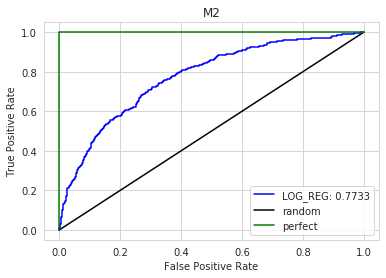

In [157]:
#AUC metrics
y_pred_p_s=logreg.predict_proba(X_test)
#y_test = np.reshape(y_test,len(y_test),)
#print(y_test.shape)
roc_auc = metrics.roc_auc_score(y_test, y_pred_p_s[:,1])
print(roc_auc)

#plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p_s[:,1])
#print(fpr)
#print(tpr)
#print(thresholds)

plt.plot(fpr,tpr,'b-', label= 'LOG_REG: %.4f'%roc_auc)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("M2")
plt.show()

In [158]:
print(y_train[y_train==1].shape)
print(y_train[y_train==0].shape)

#SMOTE, ratio = 1
sm = SMOTE(random_state=27, ratio=1)
X_train_s1, y_train_s1 = sm.fit_sample(X_train, y_train.ravel())

print(y_train_s1[y_train_s1==1].shape)
print(y_train_s1[y_train_s1==0].shape)

(1627,)
(6373,)
(6373,)
(6373,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [159]:
#LOGISTIC REGRESSION

#fitting the model with data
logreg.fit(X_train_s1,y_train_s1)

#predictions
y_pred_s1=logreg.predict(X_test) 

#metrics - prec
print(classification_report(y_test,y_pred_s1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_s1))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_s1)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1590
           1       0.39      0.70      0.50       410

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000

Accuracy: 0.7175
[[1149  441]
 [ 124  286]]


0.7757539499923302


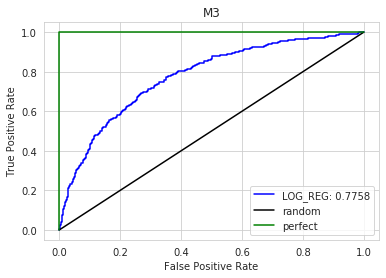

In [161]:
#AUC metrics
y_pred_p_s1=logreg.predict_proba(X_test)
#y_test = np.reshape(y_test,len(y_test),)
#print(y_test.shape)
roc_auc = metrics.roc_auc_score(y_test, y_pred_p_s1[:,1])
print(roc_auc)

#plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p_s1[:,1])
#print(fpr)
#print(tpr)
#print(thresholds)

plt.plot(fpr,tpr,'b-', label= 'LOG_REG: %.4f'%roc_auc)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("M3")
plt.show()